In [ ]:
# prompt: import numpy, pandas, matplotlib and seaborn and also add matplotlib inline
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt


In [ ]:
# btc_3m=pd.read_csv('/content/btc_3m.csv')
# btc_5m=pd.read_csv('/content/btc_5m.csv')
# btc_15m=pd.read_csv('/content/btc_15m.csv')
# btc_1h=pd.read_csv('/content/btc_1h.csv')
# btc_2h=pd.read_csv('/content/btc_2h.csv')
# btc_4h=pd.read_csv('/content/btc_4h.csv')
data=pd.read_csv('/content/btc_6h.csv')

In [ ]:
prices = data['high'].values.reshape(-1, 1)

In [ ]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)


In [ ]:
# Split data into train and test sets
train_size = int(len(scaled_prices) * 0.8)
test_size = len(scaled_prices) - train_size
train, test = scaled_prices[0:train_size, :], scaled_prices[train_size:len(scaled_prices), :]


In [ ]:
# Prepare the data for LSTM
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)


In [ ]:
time_step = 100
X_train, y_train = create_dataset(train, time_step)
X_test, y_test = create_dataset(test, time_step)


In [ ]:
# Reshape input to be [samples, time steps, features] for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=64)


Epoch 1/100
73/73 [==============================] - 13s 126ms/step - loss: 0.0042
Epoch 2/100
73/73 [==============================] - 8s 107ms/step - loss: 1.8720e-04
Epoch 3/100
73/73 [==============================] - 9s 123ms/step - loss: 1.6841e-04
Epoch 4/100
73/73 [==============================] - 9s 126ms/step - loss: 1.6967e-04
Epoch 5/100
73/73 [==============================] - 8s 105ms/step - loss: 1.7752e-04
Epoch 6/100
73/73 [==============================] - 9s 125ms/step - loss: 1.6592e-04
Epoch 7/100
73/73 [==============================] - 9s 120ms/step - loss: 1.5765e-04
Epoch 8/100
73/73 [==============================] - 8s 111ms/step - loss: 1.5132e-04
Epoch 9/100
73/73 [==============================] - 9s 129ms/step - loss: 1.3406e-04
Epoch 10/100
73/73 [==============================] - 8s 113ms/step - loss: 1.3038e-04
Epoch 11/100
73/73 [==============================] - 9s 121ms/step - loss: 1.2348e-04
Epoch 12/100
73/73 [==============================] - 9

In [ ]:
# Predict on test data
y_pred = model.predict(X_test)

35/35 [==============================] - 3s 38ms/step


In [ ]:
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

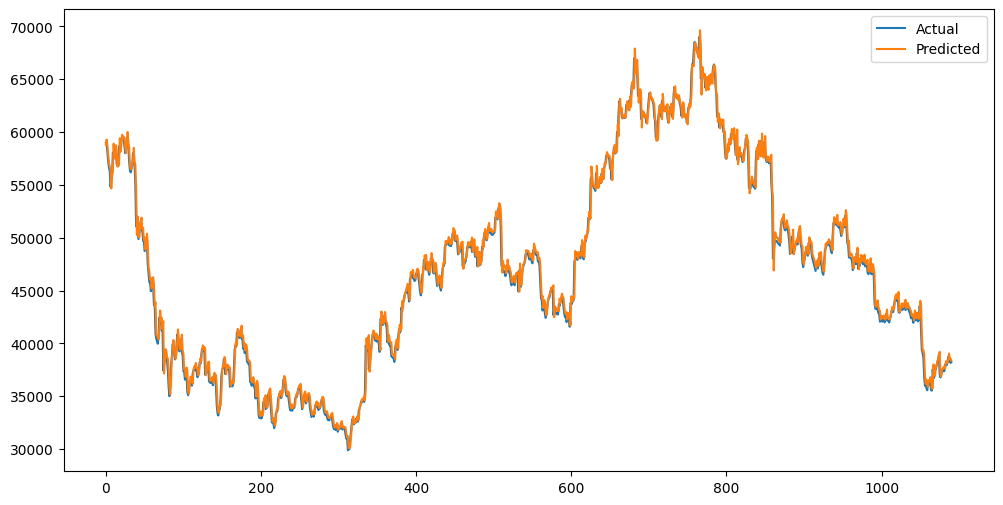

In [ ]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)


In [ ]:
rmse = np.sqrt(mse)


In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)


In [ ]:
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error (MSE): 705844.9521464624
Root Mean Squared Error (RMSE): 840.145792197082
Mean Absolute Error (MAE): 598.5848738972273
R-squared (R2) Score: 0.992102331596979


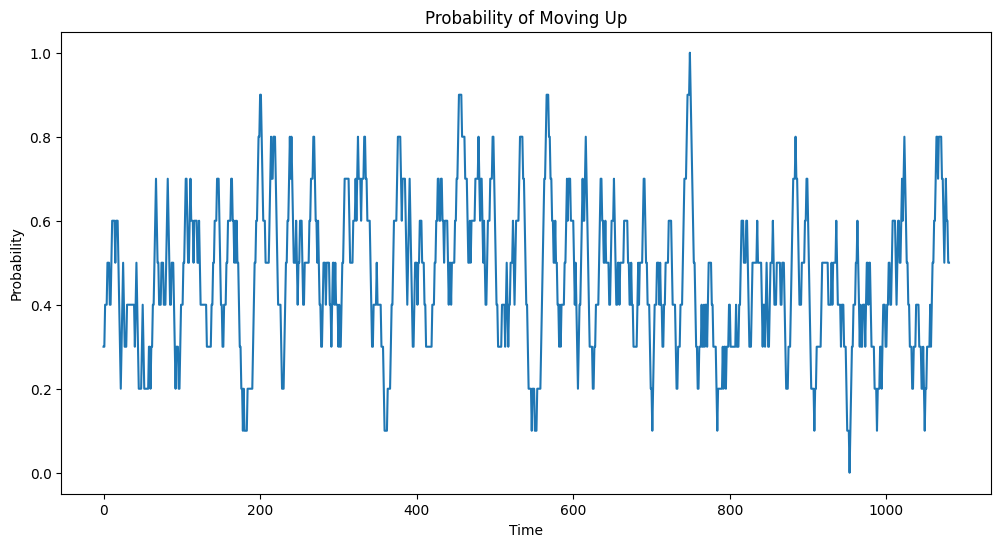

In [ ]:
# Calculate price movements
price_diff = np.diff(y_test.flatten())  # Calculate differences between consecutive prices
movements = np.where(price_diff > 0, 1, 0)  # Assign 1 for upward movement, 0 otherwise

# Define a window size for calculating probabilities
window_size = 10

# Calculate probabilities
probabilities = []
for i in range(0, len(movements) - window_size + 1):
    window = movements[i:i + window_size]
    probability = np.sum(window) / window_size
    probabilities.append(probability)

# Plotting probabilities
plt.figure(figsize=(12, 6))
plt.plot(probabilities)
plt.title('Probability of Moving Up')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.show()
